# iris 데이터셋 활용 꽃잎 너비 예측 모델
- 데이터셋 : iris.csv에서 2개 feature 사용 
- 구현 프레임 워크 : pytorch

## [1] 모듈 로딩 및 데이터 준비

In [174]:
# 모듈 로딩 

import torch                    # 텐서 및 수치 계산 함수 관련 모듈 
import torch.nn as nn           # 인공신경망 관련 모듈 
import torch.nn.functional as F    # 손실, 거래 등 함수 관련 모듈 
import torch.optim as optimizer # 최적화 기법 관련 모듈 

import pandas as pd             # 데이터 파일 분석 과련 모듈 
import matplotlib.pyplot as plt

In [175]:
torch.manual_seed(1)

In [176]:
# 데이터 로딩 : csv -> DF 

DATA_FILE = '../DATA/iris.csv'

iris_df = pd.read_csv(DATA_FILE, usecols=[2,3])
iris_df.head(2)


,petal.length,petal.width
0,1.4,0.2
1,1.4,0.2


# [2] 모델 준비 
- 학습 방법 : 지도학습 - 회귀 
- 알고리즘 : 선형관계 -> 선형모델 -> nn.Linear

In [177]:
# in_features : petal.length 1개 
# out_feature : petal.width 1개

model = nn.Linear(1,1)

In [178]:
# 가중치와 절편 확인 
for name, param in model.named_parameters():

    print(f'[{name}] {param}\n')

[weight] Parameter containing:
tensor([[0.5153]], requires_grad=True)

[bias] Parameter containing:
tensor([-0.4414], requires_grad=True)



## [3] 최적화 인스턴스 준비 

In [179]:
# 모델의 가중치와 절편 최적화 ==> 인스턴스에 전달 
adam_optim = optimizer.Adam(model.parameters(), lr = 0.1)

# [4] 학습 ==> 개발자가 구현 

### [4-1] 데이터셋 Tensor화 진행 : 데이터준비 시 진행하거나 또는 학습 전 진행 

In [180]:
feature_ts = torch.from_numpy(iris_df[['petal.length']].values).float()
feature_ts.shape

torch.Size([150, 1])

In [181]:
iris_df['petal.length'].values

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [182]:
target_ts = torch.from_numpy(iris_df[['petal.width']].values).float()
target_ts.shape

torch.Size([150, 1])

### [4-2] 학습 진행 
- 학습 횟수 결정 => 에포크 설정 
- 학습 결과 저장 => 손실저장 변수

In [183]:
EPOCH = 100
loss_history = [] # 시각화 하기 위해 리스트에 담음 

In [184]:
# 모델 학습 함수 
def training():

    EPOCH = 100
    loss_history = []

    for epoch in range(EPOCH):
        # -(1) 학습 진행 - forward 
        pre_y = model(feature_ts)

        # -(2) 오차계산 - 손실함수 
        loss = F.mse_loss(pre_y, target_ts)
        loss_history.append(loss.item()) # tensor로 들어가서 item으로 뺌 

        # -(3) 최적화 - 가중치, 절편 업데이트 backward 
        adam_optim.zero_grad()
        loss.backward()
        adam_optim.step()

        # -(4) 학습 결과 출력 및 저장 
        print(f'[{epoch}/{EPOCH}] LOSS : {loss}')

    return loss_history

In [185]:
# 모델 학습 진행 

loss = training()
loss

[0/100] LOSS : 0.16012583673000336
[1/100] LOSS : 0.074522964656353
[2/100] LOSS : 0.13772442936897278
[3/100] LOSS : 0.07824525237083435
[4/100] LOSS : 0.04498450458049774
[5/100] LOSS : 0.07436980307102203
[6/100] LOSS : 0.09182848036289215
[7/100] LOSS : 0.06934763491153717
[8/100] LOSS : 0.04540804773569107
[9/100] LOSS : 0.04900302737951279
[10/100] LOSS : 0.066199891269207
[11/100] LOSS : 0.06832201778888702
[12/100] LOSS : 0.05394704267382622
[13/100] LOSS : 0.042835745960474014
[14/100] LOSS : 0.04668451473116875
[15/100] LOSS : 0.056329306215047836
[16/100] LOSS : 0.05706849321722984
[17/100] LOSS : 0.04860337823629379
[18/100] LOSS : 0.042276471853256226
[19/100] LOSS : 0.04480516538023949
[20/100] LOSS : 0.0506235808134079
[21/100] LOSS : 0.05096087604761124
[22/100] LOSS : 0.04575872793793678
[23/100] LOSS : 0.042143814265728
[24/100] LOSS : 0.04404692351818085
[25/100] LOSS : 0.04756830632686615
[26/100] LOSS : 0.04734067618846893
[27/100] LOSS : 0.04395326226949692
[28/10

[0.16012583673000336,
 0.074522964656353,
 0.13772442936897278,
 0.07824525237083435,
 0.04498450458049774,
 0.07436980307102203,
 0.09182848036289215,
 0.06934763491153717,
 0.04540804773569107,
 0.04900302737951279,
 0.066199891269207,
 0.06832201778888702,
 0.05394704267382622,
 0.042835745960474014,
 0.04668451473116875,
 0.056329306215047836,
 0.05706849321722984,
 0.04860337823629379,
 0.042276471853256226,
 0.04480516538023949,
 0.0506235808134079,
 0.05096087604761124,
 0.04575872793793678,
 0.042143814265728,
 0.04404692351818085,
 0.04756830632686615,
 0.04734067618846893,
 0.04395326226949692,
 0.04216213896870613,
 0.043818630278110504,
 0.04577568918466568,
 0.0450049452483654,
 0.04280659183859825,
 0.042290251702070236,
 0.04369340091943741,
 0.0444737933576107,
 0.04342243820428848,
 0.04221882298588753,
 0.04250564053654671,
 0.04345370829105377,
 0.043386951088905334,
 0.04245591163635254,
 0.04211854189634323,
 0.042689140886068344,
 0.04302692785859108,
 0.042554982

<function matplotlib.pyplot.show(close=None, block=None)>

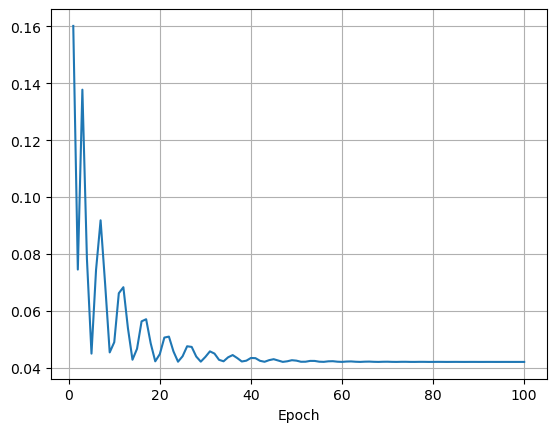

In [186]:
# 학습 후 loss 시각화 

plt.plot(range(1,101), loss)
plt.grid()
plt.xlabel('Epoch')
plt.show